In [35]:
#import modules
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [36]:
#import sqlalchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [37]:
#engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [38]:
# reflect an existing database into a new model
# reflect the tables
# We can view all of the classes that automap found
db = automap_base()
db.prepare(engine, reflect=True)
db.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
# Create our session (link) from Python to the DB
measurement = db.classes.measurement
station = db.classes.station
session = Session(engine)

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
predata = session.query(func.strftime("%Y-%m-%d", measurement.date), measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", measurement.date) > dt.date(2016, 8, 22)).all()
predf = pd.DataFrame(predata, columns = ['date', 'precipitation'])
predf.set_index('date', inplace = True)
predf = predf.sort_values(by='date')
predf

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


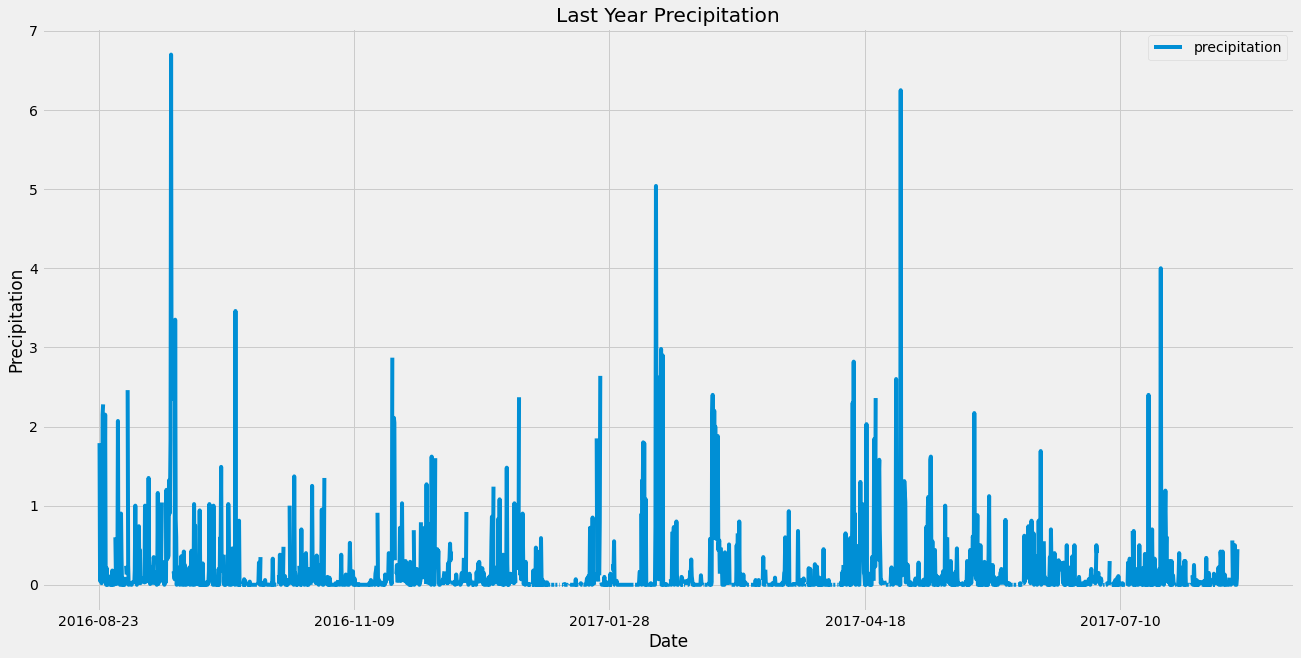

In [49]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))
predf.plot(ax = ax, x_compat = True)
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_title("Last Year Precipitation")
plt.savefig("precipitationplot.png")
plt.show()

In [50]:
# Use Pandas to calcualte the summary statistics for the precipitation data
predf.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station.id).distinct().count()
stations

9

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationcount = (session.query(measurement.station, func.count(measurement.station))
                        .group_by(measurement.station)
                        .order_by(func.count(measurement.station).desc())
                        .all())
stationcount

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
beststation = 'USC00519281'
temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == beststation).all()
temp

[(54.0, 85.0, 71.66378066378067)]

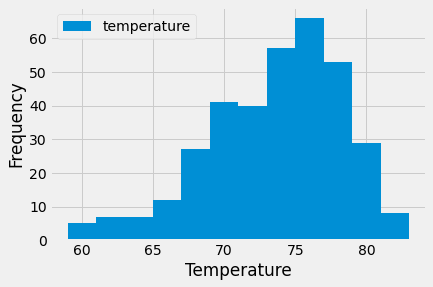

In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temptobs = session.query(measurement.date, measurement.tobs).filter(measurement.station == most_active_station).\
    filter(func.strftime("%Y-%m-%d", measurement.date) > dt.date(2016, 8, 22)).all()
temptobsdf = pd.DataFrame(temptobs, columns = ['date', 'temperature'])
fig, ax = plt.subplots()
temptobsdf.plot.hist(bins = 12, ax = ax)
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')
plt.savefig("tempplot.png")
plt.show()